In [1]:
import pandas as pd
from pycaret.regression import*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option("display.max_columns",100)

In [4]:
df2=pd.read_csv("test (1).csv")

In [5]:
df1=pd.read_csv("train (2).csv")

In [6]:
df1.shape, df2.shape

((1460, 81), (1459, 80))

In [7]:
df1.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
df2.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [9]:
df=df1.append(df2)

In [10]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [11]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


In [12]:
exp_name=setup(data=df1,target="SalePrice")

,Description,Value
0,session_id,2175
1,Target,SalePrice
2,Original Data,"(1460, 81)"
3,Missing Values,True
4,Numeric Features,19
5,Categorical Features,61
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1021, 401)"


In [13]:
best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,17408.3196,878219704.4375,28634.5517,0.8669,0.1390,0.1009,0.5780
lightgbm,Light Gradient Boosting Machine,17743.6989,890487625.2583,29079.0728,0.8651,0.1450,0.1029,0.4590
rf,Random Forest Regressor,18396.7573,925545223.1308,29745.8200,0.8603,0.1537,0.1096,1.4870
xgboost,Extreme Gradient Boosting,18696.2319,963526019.2000,30309.2535,0.8539,0.1488,0.1077,1.4570
omp,Orthogonal Matching Pursuit,18242.4025,1123887712.9231,30287.4687,0.8299,0.1502,0.1082,0.0390
et,Extra Trees Regressor,22392.3612,1217500190.5021,34545.8865,0.8098,0.1902,0.1356,1.9230
ridge,Ridge Regression,18699.1848,1350570140.8000,32919.8805,0.7972,0.1780,0.1114,0.1290
lasso,Lasso Regression,19650.1479,1393341760.0000,33794.3785,0.7878,0.2526,0.1228,0.2470
en,Elastic Net,20886.9598,1549843302.4000,35906.1135,0.7654,0.1661,0.1230,0.2520
ada,AdaBoost Regressor,25184.7920,1592398953.7625,38559.9538,0.7609,0.2060,0.1622,0.5950


In [14]:
gbr=create_model("gbr",fold=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,15053.6542,474498809.1228,21782.9936,0.9198,0.1195,0.0892
1,18608.9684,1860184391.8834,43129.8550,0.7207,0.1805,0.1205
2,16018.1582,490889927.7811,22156.0359,0.9123,0.1267,0.0947
3,18714.5808,958446278.4672,30958.7835,0.8759,0.1669,0.1090
4,18691.6703,691614298.9447,26298.5608,0.8498,0.1406,0.1085
5,15308.9332,413835811.5331,20342.9548,0.9259,0.1297,0.0975
6,17688.8485,1252613809.4664,35392.2846,0.8272,0.1291,0.0930
7,15021.2847,404273127.3593,20106.5444,0.9251,0.1084,0.0833
8,18260.2629,800166421.3542,28287.2130,0.8653,0.1378,0.1057
9,20716.8346,1435674168.4622,37890.2912,0.8465,0.1510,0.1073


In [15]:
# Herhangi bir feature engineering yapmadan Pycaret Regression algoritması ile baktığımızda lightgbm algoritması ile 
#%84 başarı elde ettik.
#şimdi feature engineering yaparak başarımızı arttırabilir miyiz ona bakacağız.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [17]:
df.isnull().sum().sort_values(ascending=False).head(35)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageQual       159
GarageYrBlt      159
GarageFinish     159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Utilities          2
Functional         2
BsmtFullBath       2
BsmtHalfBath       2
GarageArea         1
BsmtFinSF2         1
Exterior1st        1
TotalBsmtSF        1
GarageCars         1
BsmtUnfSF          1
Electrical         1
BsmtFinSF1         1
KitchenQual        1
SaleType           1
Exterior2nd        1
dtype: int64

In [18]:
df=df.drop(["MiscFeature","Alley","Fence","FireplaceQu"],axis=1)
#boşluk sayısı çok fala olduğu için sildim

In [19]:
df.shape

(2919, 77)

In [20]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [21]:
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.008931,-0.027549,-0.040746,-0.029771,-0.002839,-0.016581,-0.050438,-0.025219,-0.016947,...,-0.007056,0.009960,0.021609,-0.046538,0.022208,0.014332,0.008244,0.006448,-0.256050,-0.021917
MSSubClass,0.008931,1.000000,-0.417359,-0.201730,0.033638,-0.065625,0.034409,0.043315,0.005433,-0.064311,...,-0.017654,-0.015923,-0.020867,-0.037529,-0.049181,-0.003080,-0.028867,-0.001231,-0.015028,-0.084284
LotFrontage,-0.027549,-0.417359,1.000000,0.489896,0.217645,-0.075508,0.122811,0.091557,0.221079,0.219408,...,0.122070,0.164896,0.011509,0.028289,0.075858,0.174119,0.044272,0.011254,-0.007917,0.351799
LotArea,-0.040746,-0.201730,0.489896,1.000000,0.100541,-0.035617,0.024128,0.021612,0.125596,0.194031,...,0.158045,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029,0.004156,-0.024234,0.263843
OverallQual,-0.029771,0.033638,0.217645,0.100541,1.000000,-0.093847,0.597554,0.571532,0.432947,0.281810,...,0.255317,0.298084,-0.139256,0.018715,0.042910,0.030740,0.005562,0.030405,-0.019614,0.790982
OverallCond,-0.002839,-0.065625,-0.075508,-0.035617,-0.093847,1.000000,-0.368477,0.047654,-0.136007,-0.050418,...,0.020123,-0.068978,0.071044,0.043739,0.043713,-0.016876,0.033956,-0.006256,0.030102,-0.077856
YearBuilt,-0.016581,0.034409,0.122811,0.024128,0.597554,-0.368477,1.000000,0.612235,0.314051,0.279581,...,0.229426,0.198554,-0.374073,0.015958,-0.041046,0.002304,-0.010886,0.013938,-0.012344,0.522897
YearRemodAdd,-0.050438,0.043315,0.091557,0.021612,0.571532,0.047654,0.612235,1.000000,0.196875,0.152126,...,0.218513,0.242182,-0.220456,0.037433,-0.046878,-0.011407,-0.003124,0.017693,0.033203,0.507101
MasVnrArea,-0.025219,0.005433,0.221079,0.125596,0.432947,-0.136007,0.314051,0.196875,1.000000,0.303490,...,0.166200,0.144650,-0.111499,0.013612,0.065209,0.004512,0.044811,-0.000117,-0.018510,0.477493
BsmtFinSF1,-0.016947,-0.064311,0.219408,0.194031,0.281810,-0.050418,0.279581,0.152126,0.303490,1.000000,...,0.223492,0.124163,-0.099712,0.050908,0.096823,0.084462,0.093295,-0.000942,0.022556,0.386420


In [22]:
abs(df.corr()["SalePrice"]).sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
Id               0.021917
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePr

Text(0.5, 1.0, 'Sale Price')

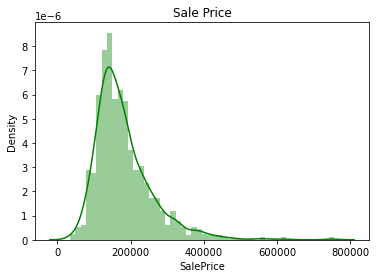

In [74]:
sns.distplot(df["SalePrice"], bins=50,color="green").set_title("Sale Price")

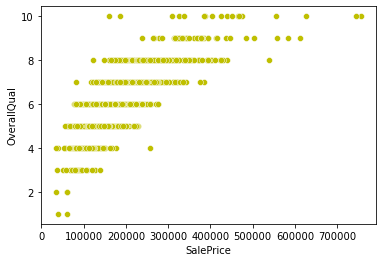

In [80]:
sns.scatterplot(x="SalePrice", y="OverallQual", data=df,color="y");

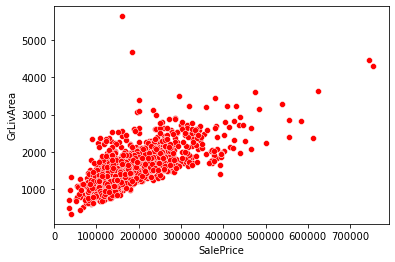

In [81]:
sns.scatterplot(x="SalePrice", y="GrLivArea", data=df,color="r");

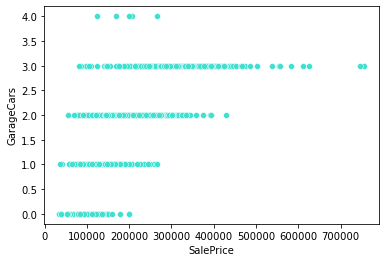

In [83]:
sns.scatterplot(x="SalePrice", y="GarageCars", data=df,color="turquoise");

In [23]:
#%20 nin altında olan yerleri sileceğim.
df=df.drop(["BedroomAbvGr","KitchenAbvGr","EnclosedPorch","ScreenPorch","PoolArea","MSSubClass","OverallCond","MoSold",
            "3SsnPorch","YrSold","LowQualFinSF","MiscVal","BsmtHalfBath","BsmtFinSF2"],axis=1)

In [24]:
df.shape

(2919, 63)

In [25]:
abs(df.corr()["SalePrice"]).sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
BsmtFullBath    0.227122
BsmtUnfSF       0.214479
Id              0.021917
Name: SalePrice, dtype: float64

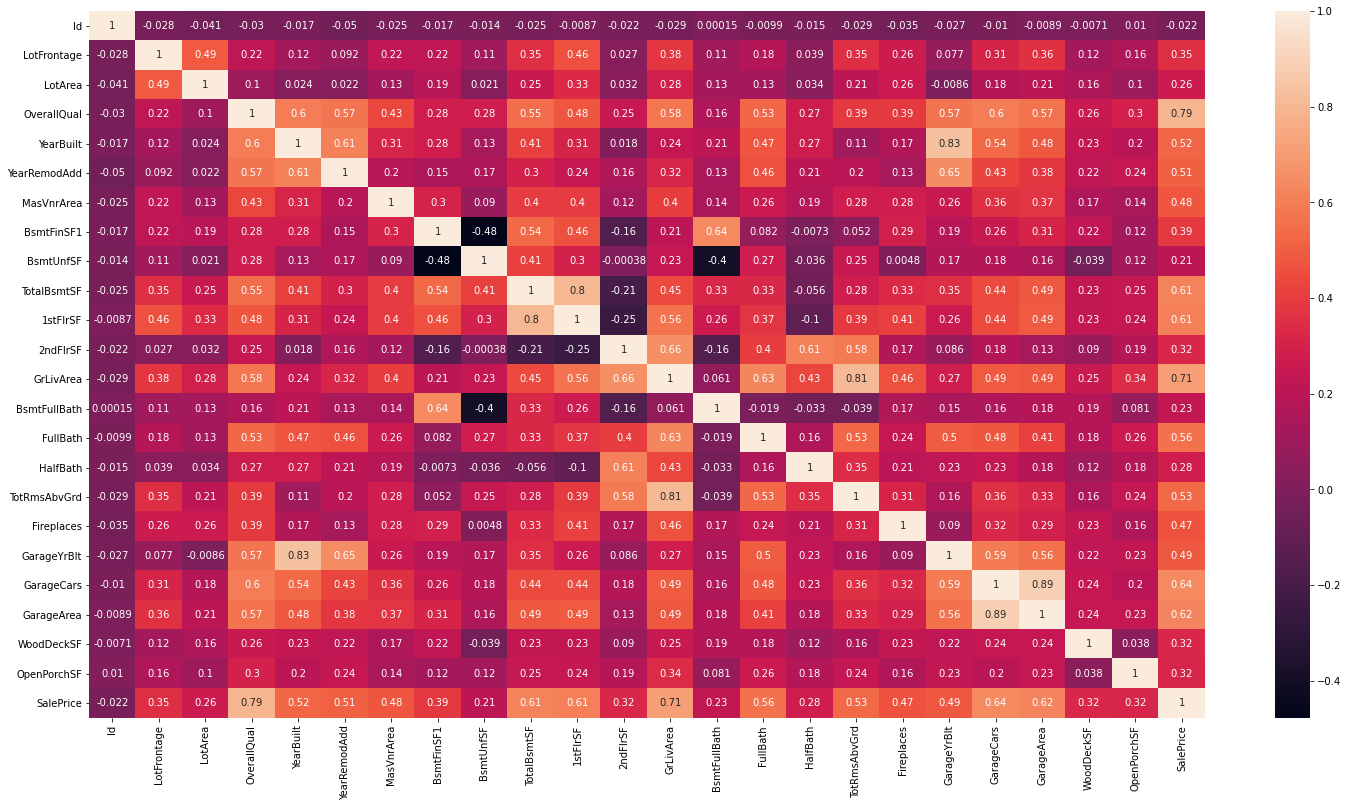

In [26]:
plt.figure(figsize=(25,13))
sns.heatmap(df.corr(),annot=True);

In [27]:
df["age"]=2021-df["YearBuilt"]
df["remodel_age"]=2021-df["YearRemodAdd"]
df["garage_age"]=2021-df["GarageYrBlt"]
#yılları yaşa çevirdim

In [28]:
df=df.drop(["YearBuilt","YearRemodAdd","GarageYrBlt"],axis=1)

In [29]:
df.isnull().sum().sort_values(ascending=False).head(30)

PoolQC          2909
SalePrice       1459
LotFrontage      486
garage_age       159
GarageFinish     159
GarageCond       159
GarageQual       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Functional         2
Utilities          2
BsmtFullBath       2
Electrical         1
Exterior2nd        1
Exterior1st        1
BsmtFinSF1         1
TotalBsmtSF        1
BsmtUnfSF          1
GarageArea         1
SaleType           1
KitchenQual        1
GarageCars         1
1stFlrSF           0
dtype: int64

In [30]:
#filling the gaps

In [31]:
df["LotFrontage"].fillna(df.groupby("Neighborhood")["LotFrontage"].transform("mean"),inplace=True)

In [32]:
df["LotFrontage"].isnull().sum()

0

In [33]:
df["garage_age"].fillna(df["garage_age"].mean(),inplace=True)

In [34]:
df.GarageFinish.value_counts()

Unf    1230
RFn     811
Fin     719
Name: GarageFinish, dtype: int64

In [35]:
df["GarageCond"].fillna("None",inplace=True)
df["GarageQual"].fillna("None", inplace=True)
df["GarageFinish"].fillna("Unf",inplace=True)
df["GarageType"].fillna("None", inplace=True)   
df["PoolQC"].fillna("None",inplace=True)
#garaj olmadığı için değerleri none la doldurduk

In [36]:
df.BsmtCond.value_counts()

TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64

In [37]:
df.BsmtFinType1.value_counts()

Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64

In [38]:
df["BsmtCond"].fillna("None",inplace=True)
df["BsmtExposure"].fillna("No",inplace=True)
df["BsmtQual"].fillna("None",inplace=True)
df["BsmtFinType2"].fillna("None",inplace=True)
df["BsmtFinType1"].fillna("Unf",inplace=True)
     

In [39]:
df.MasVnrType.value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [40]:
df.MSZoning.value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [41]:
df.Exterior1st.value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
Stone         2
CBlock        2
AsphShn       2
ImStucc       1
Name: Exterior1st, dtype: int64

In [42]:
df.TotalBsmtSF.value_counts()

0.0       78
864.0     74
672.0     29
912.0     26
1040.0    25
          ..
1949.0     1
1231.0     1
1829.0     1
1475.0     1
1243.0     1
Name: TotalBsmtSF, Length: 1058, dtype: int64

In [43]:
df.Exterior2nd.value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
Stucco       47
BrkFace      47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [44]:
df.KitchenQual.value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [45]:
df["MasVnrType"].fillna("None",inplace=True)
df["MasVnrArea"].fillna(0,inplace=True)
df["MSZoning"].fillna("RL",inplace=True)
df["Functional"].fillna("Typ",inplace=True)
df["BsmtFullBath"].fillna(0,inplace=True)
df["Utilities"].fillna("AllPub",inplace=True)
df["BsmtUnfSF"].fillna(0,inplace=True)
df["Electrical"].fillna("SBrkr",inplace=True)
df["SaleType"].fillna("WD",inplace=True)
df["GarageArea"].fillna(0,inplace=True)
df["BsmtFinSF1"].fillna(0,inplace=True)
df["GarageCars"].fillna(0,inplace=True)
df["Exterior1st"].fillna("VinylSd",inplace=True)
df["TotalBsmtSF"].fillna(0,inplace=True)
df["Exterior2nd"].fillna(df["Exterior2nd"].mode()[0],inplace=True)
df["KitchenQual"].fillna("TA",inplace=True)

       
        
           
         
       
          
          
         
           
         
         
         
        
        
        
        

In [46]:
df.isnull().sum().sort_values(ascending=False)

SalePrice       1459
garage_age         0
OverallQual        0
BsmtFinType1       0
BsmtExposure       0
                ... 
Electrical         0
CentralAir         0
HeatingQC          0
Heating            0
Id                 0
Length: 63, dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   LotShape       2919 non-null   object 
 6   LandContour    2919 non-null   object 
 7   Utilities      2919 non-null   object 
 8   LotConfig      2919 non-null   object 
 9   LandSlope      2919 non-null   object 
 10  Neighborhood   2919 non-null   object 
 11  Condition1     2919 non-null   object 
 12  Condition2     2919 non-null   object 
 13  BldgType       2919 non-null   object 
 14  HouseStyle     2919 non-null   object 
 15  OverallQual    2919 non-null   int64  
 16  RoofStyle      2919 non-null   object 
 17  RoofMatl       2919 non-null   object 
 18  Exterior

In [48]:
#object değerlerimizin olduğunu gördük
df_dummies=pd.get_dummies(df,drop_first=True)

In [49]:
df_dummies

,Id,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,7,196.0,706.0,150.0,856.0,856,854,...,0,0,0,0,1,0,0,0,1,0
1,2,80.0,9600,6,0.0,978.0,284.0,1262.0,1262,0,...,0,0,0,0,1,0,0,0,1,0
2,3,68.0,11250,7,162.0,486.0,434.0,920.0,920,866,...,0,0,0,0,1,0,0,0,1,0
3,4,60.0,9550,7,0.0,216.0,540.0,756.0,961,756,...,0,0,0,0,1,0,0,0,0,0
4,5,84.0,14260,8,350.0,655.0,490.0,1145.0,1145,1053,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,21.0,1936,4,0.0,0.0,546.0,546.0,546,546,...,0,0,0,0,1,0,0,0,1,0
1455,2916,21.0,1894,4,0.0,252.0,294.0,546.0,546,546,...,0,0,0,0,1,0,0,0,0,0
1456,2917,160.0,20000,5,0.0,1224.0,0.0,1224.0,1224,0,...,0,0,0,0,1,0,0,0,0,0
1457,2918,62.0,10441,5,0.0,337.0,575.0,912.0,970,0,...,0,0,0,0,1,0,0,0,1,0


In [50]:
df_train=df_dummies[:1459]
df_test=df_dummies[1459:]





In [51]:
y=df_train["SalePrice"]

In [52]:
x=df_train.drop(["SalePrice"],axis=1)
x.shape

(1459, 228)

In [53]:
from sklearn.ensemble import GradientBoostingRegressor
GBR=GradientBoostingRegressor()
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=13)

In [55]:
GBR.fit(x_train,y_train)
y_pred_gbr=GBR.predict(x_test)

In [56]:
(mean_squared_error(y_test,y_pred_gbr))**0.5

33632.2248139703

In [57]:
r2_score(y_test,y_pred_gbr)

0.8174252520790802

In [58]:
from sklearn.ensemble import RandomForestRegressor
r=RandomForestRegressor()

In [59]:
r.fit(x_train,y_train)
y_pred_r=r.predict(x_test)

In [60]:
(mean_squared_error(y_test,y_pred_r))**0.5

37222.30107209288

In [61]:
r2_score(y_test,y_pred_r)

0.7763669689732376

In [62]:
#Modeli Uygulama

In [63]:
X=pd.get_dummies(df_test,drop_first=True)
X.head()

,Id,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1459,1460,75.0,9937,5,0.0,830.0,136.0,1256.0,1256,0,...,0,0,0,0,1,0,0,0,1,0
0,1461,80.0,11622,5,0.0,468.0,270.0,882.0,896,0,...,0,0,0,0,1,0,0,0,1,0
1,1462,81.0,14267,6,108.0,923.0,406.0,1329.0,1329,0,...,0,0,0,0,1,0,0,0,1,0
2,1463,74.0,13830,5,0.0,791.0,137.0,928.0,928,701,...,0,0,0,0,1,0,0,0,1,0
3,1464,78.0,9978,6,20.0,602.0,324.0,926.0,926,678,...,0,0,0,0,1,0,0,0,1,0


In [64]:
del X["SalePrice"]

In [65]:
X.shape

(1460, 228)

In [66]:
predictions=GBR.predict(X)

In [73]:
predictions

array([147544.3187574 , 113838.47939211, 161791.90969049, ...,
       166146.90955596, 116519.11857248, 248014.72783653])

In [67]:
X.loc[:,"SalePrice"]=predictions

In [68]:
X.shape

(1460, 229)

In [69]:
output=pd.DataFrame({"Id":df_test.Id, "SalePrice": predictions})
output.shape

(1460, 2)

In [70]:
output.head()

,Id,SalePrice
1459,1460,147544.318757
0,1461,113838.479392
1,1462,161791.909690
2,1463,176248.085581
3,1464,182537.100924


In [72]:
output.to_csv("predicted_house_sale_price.csv")
print("Mission Completed :")

Mission Completed :
